In [14]:
import numpy as np
import pandas as pd

### Supervised Learning

Supervised learning is the machine learning task of inferring a function from labeled training data. The training data consist of a set of training examples. Each example is a pair consisting of an input object (typically a vector) and a desired output value. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. 

- **Classification** - Identifying to which category an object belongs to. 
- **Regression** - Predicting a continuous-valued attribute associated with an object.

### Understanding the data

This dataset contains 13910 measurements from 16 chemical sensors utilized in simulations for drift compensation in a discrimination task of 6 gases at various levels of concentrations.
The dataset comprises recordings from six distinct pure gaseous substances, namely Ammonia, Acetaldehyde, Acetone, Ethylene, Ethanol, and Toluene, each dosed at a wide variety of concentration values ranging from 5 to 1000 ppmv.

#### Read the csv data into a Pandas dataframe and print the first 5 rows

In [15]:
data = pd.read_csv("./formatted_data.csv",header=0, index_col=False)
data.head()

,Label,Sensor_A1,Sensor_A2,Sensor_A3,Sensor_A4,Sensor_A5,Sensor_A6,Sensor_A7,Sensor_A8,Sensor_B1,...,Sensor_O8,Sensor_P1,Sensor_P2,Sensor_P3,Sensor_P4,Sensor_P5,Sensor_P6,Sensor_P7,Sensor_P8,Batch_No
0,1,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,...,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529,1
1,1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,...,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225,1
2,1,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,...,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370,1
3,1,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,...,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957,1
4,1,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,...,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756,1


#### For each sensor the second column is the normalized form of the first column, so to avoid duplicates we drop the first column (A1,B1...P1) for each sensor.

In [16]:
drop_cols = ['Sensor_'+x+'1' for x in map(chr,range(65,81))]
drop_cols.append('Batch_No')
data = data.drop(drop_cols, axis=1)
data.head()

,Label,Sensor_A2,Sensor_A3,Sensor_A4,Sensor_A5,Sensor_A6,Sensor_A7,Sensor_A8,Sensor_B2,Sensor_B3,...,Sensor_O6,Sensor_O7,Sensor_O8,Sensor_P2,Sensor_P3,Sensor_P4,Sensor_P5,Sensor_P6,Sensor_P7,Sensor_P8
0,1,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,1.768526,2.269085,...,-0.619214,-1.071137,-3.037772,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,1,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,2.164706,4.901063,...,-1.004812,-1.530519,-1.994993,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,1,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,2.840403,7.386357,...,-1.518135,-2.384784,-2.867291,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,1,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,2.851173,10.840889,...,-1.644751,-2.607199,-3.058086,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,1,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,3.480866,10.409176,...,-2.249702,-3.594763,-4.181920,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756


#### Summarize the data to better understand its distribution and decide on the appropriate preprocessing steps

In [17]:
data.describe()

,Label,Sensor_A2,Sensor_A3,Sensor_A4,Sensor_A5,Sensor_A6,Sensor_A7,Sensor_A8,Sensor_B2,Sensor_B3,...,Sensor_O6,Sensor_O7,Sensor_O8,Sensor_P2,Sensor_P3,Sensor_P4,Sensor_P5,Sensor_P6,Sensor_P7,Sensor_P8
count,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,...,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000
mean,3.387994,6.638156,12.936688,18.743953,26.890695,-9.158655,-14.402383,-59.927598,6.648033,15.538389,...,-5.664942,-9.601927,-19.136500,6.072066,7.138634,14.929364,19.090980,-4.901016,-8.167792,-16.089791
std,1.728602,13.486391,17.610061,24.899450,38.107685,12.729206,21.304606,131.017675,15.585780,16.557172,...,4.996011,9.220031,26.516679,4.642192,5.248573,12.437311,14.391810,4.195360,7.637701,20.958479
min,1.000000,0.088287,0.000100,0.000100,0.000100,-131.332873,-227.627758,-1664.735576,0.185164,0.002252,...,-36.163600,-76.069200,-482.278033,0.712112,0.003238,0.011488,0.118849,-30.205911,-58.844076,-410.152297
25%,2.000000,2.284843,1.633350,2.386836,4.967988,-11.587169,-17.292559,-48.492764,2.776693,3.700962,...,-7.930521,-13.212575,-22.363498,3.007380,3.059178,5.407551,8.039227,-6.789599,-11.162406,-18.938690
50%,3.000000,3.871227,4.977123,7.250892,11.680725,-3.338700,-4.956917,-14.040088,4.734586,9.968119,...,-4.469910,-7.338850,-13.527887,4.973783,5.809107,11.325215,14.560676,-3.881763,-6.305962,-11.747499
75%,5.000000,8.400619,17.189165,26.411109,34.843226,-1.126897,-1.670327,-5.212213,8.608522,20.383726,...,-2.043721,-3.260080,-7.358031,7.389566,10.222169,21.207572,26.547437,-1.804032,-2.874532,-6.429690
max,6.000000,1339.879283,167.079751,226.619457,993.605306,-0.006941,22.201589,115.273147,1672.363221,131.449632,...,-0.009767,9.270956,11.516418,45.574835,32.203601,297.225880,195.242555,-0.003817,6.851792,8.357968


### Data preprocessing 
1. **Dealing with missing values** - Real world datasets often contain missing values, represented by blanks, NaNs etc
  1. Discard rows and/or columns containing missing values at the risk of losing valuable data
  2. Impute missing values by replacing them with the mean value of the column. An advanced way is to build a regression model to impute the missing values
  
2. **Encoding categorical features** - Using a label encoder helps us transform non-numerical labels to numerical labels. Another approach is Dummy encoding where you convert an attribute by creating duplicate variables which represents one level of a categorical variable. Presence of a level is represent by 1 and absence is represented by 0. For every level present, one dummy variable will be created. <br> In this dataset our target labels are categorical values that have already been encoded as numerical <br>
[1: Ethanol; 2: Ethylene; 3:Ammonia; 4: Acetaldehyde; 5: Acetone; 6: Toluene]
3. **Feature scaling** - We standardize the features to ensure that just because some features have a larger magnitude our model won't lead us to using them as the main predictor. Feature scaling helps reduces the training time for models and avoids the optimization from getting stuck in local optima.
 1. Min-Max Scaling - Involves rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.
 2. Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.
 3. Scaling to unit length - the vector magnitude is used to obtain a vector of unit length. This usually means dividing each component by the [Euclidean length of the vector](https://help.github.com/articles/basic-writing-and-formatting-syntax/#links).

#### Separate the data into input and output components and perform feature scaling on the input

In [18]:
from sklearn import preprocessing
target = data['Label']
data = data.drop('Label', axis=1)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
data_scaled = min_max_scaler.fit_transform(data)

### Split the dataset into a training set and test set. 

If we use the entire dataset to train our model, it will end up modeling random error/noise present in the data, and will have poor predictive performance on unseen future data.  This situation is known as **Overfitting**. To avoid this we hold out part of the available data as a test set and use the remaining for training. Some common splits are 90/10, 80/20, 75/25. 

There is a risk of overfitting on the test set as you try to optimize the hyperparameters of parametric models to achieve optimal performance.  To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”. Thus training is carried out on the training set, evaluation is done on the validation set and once the parameters have been tuned, final evaluation is carried out on the "unseen" test set. 

The drawback of this approach is that we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. To solve this we use a procedure called **Cross-validation** which is discussed later.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.25, random_state=0)

### Binomial v/s Multinomial classification 

**Binomial** classification problem is one where the dataset has 2 target classes in the dataset. We are dealing with a **Multinomial** classification problem, as we have more than 2 target classes in our dataset. To leverage binary classifiers for multinomial classification we can use one of the following strategies-
1. One-vs-All : It involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives.

2. One-vs-One : It involves training K(K-1)/2 binary classifiers for a K-multiclass problem; each receives the samples of a pair of classes from the original training set, and must learn to distinguish these two classes. At prediction time, a voting scheme is applied: all K (K − 1) / 2 classifiers are applied to an unseen sample and the class that got the highest number of "+1" predictions gets predicted by the combined classifier.

### Training a model

#### Decision Tree - 
Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable based on several input variables. It is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node.

Non-parametric models (can) become more and more complex with an increasing amount of data.


In [20]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print "Accuracy: %0.2f" %dt_classifier.score(X_test, y_test)

Accuracy: 0.97


In the above code snippet we fit a decision tree to our dataset, used it to make predictions on our test set and we calculated its accuracy as the number of correct predictions from all predictions made. Accuracy is a starting point but is not a sufficient measure for evaluating a model's predictive power due to a phenomena known as [**Accuracy Paradox**](https://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it/). It yields misleading results if the data set is unbalanced.


### Model evaluation metrics

A clean and unambiguous way to visualize the performance of a classifier is to use a use a **Confusion matrix**

                          

|                                 | *Predicted class - Positive* | *Predicted class - Negative* |
|---------------------------------|----------------------------------|                                  |
|**_Acutal class - Positive_**  |  True Positive  (TP)             |   False negative  (FN)           |
|**_Acutal class - Negative_**  |  False Positive (FP)             |   True negative   (TN)           |

- True Positives (TP): number of positive examples, labeled as such.
- False Positives (FP): number of negative examples, labeled as positive.
- True Negatives (TN): number of negative examples, labeled as such.
- False Negatives (FN): number of positive examples, labeled as negative.

We use these values to calculate **Precision** and **Recall**-

1. Precision answers the following question : out of all the examples the classifier labeled as positive, what fraction were correct. 
 $$Precision = \frac{TP}{TP + FP}$$

2. Recall answers out of all the positive examples there were, what fraction did the classifier pick up. It is calculated as - 
 $$Recall = \frac{TP}{TP + FN}$$

The harmonic mean of Precision and Recall is known as the **F1 Score**. It conveys the balance between the precision and the recall. 
$$ F_1  score = \frac{2 \times Precision \times Recall}{Precision + Recall}$$



Let's visualize the confusion matrix for the decision tree. The sci-kit learn method just returns a nested array without any labels, so we plot for easier interpretation

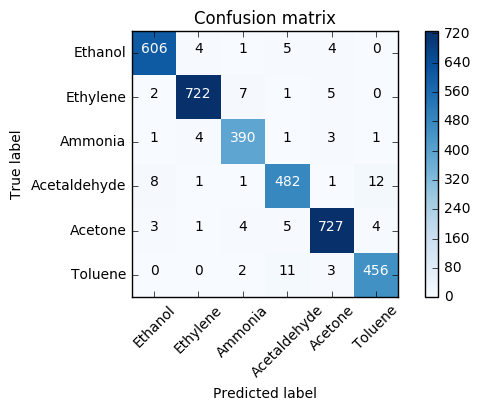

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"],
                      title='Confusion matrix')

#### We use one of the methods to compute Precision, Recall and F-1 score for each class. 

In [22]:
from sklearn.metrics import classification_report
print classification_report(y_test, y_pred, target_names=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"])

              precision    recall  f1-score   support

     Ethanol       0.98      0.98      0.98       620
    Ethylene       0.99      0.98      0.98       737
     Ammonia       0.96      0.97      0.97       400
Acetaldehyde       0.95      0.95      0.95       505
     Acetone       0.98      0.98      0.98       744
     Toluene       0.96      0.97      0.97       472

 avg / total       0.97      0.97      0.97      3478



### Cross-Validation

Cross validation is a method for estimating the prediction accuracy of a model on an unseen dataset without using a validation set. Instead of just holding out one part of the data to train on, you hold out different parts. For each part, you train on the rest, and evaluate the set you held out. Now you have effectively used all of your data for testing & training, without testing on data you trained on.

The different methods are - 

1. **k-fold CV** -  The training set is split into k smaller sets and the model is trained using k-1 folds. The resulting model is validated on the remaining part of the data
2. **Leave One out** - Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for n samples, we have n different training sets and n different tests set. 
3. **Leave P Out** - Similar to Leave One out as it creates all the possible training/test sets by removing p samples from the complete set. 
4. **Random Shuffle & Split** - It will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

In [23]:
from sklearn.model_selection import cross_val_score

def cv_score(clf,k):
    f1_scores = cross_val_score(clf, data_scaled, target, cv=k, scoring='f1_macro')
    print f1_scores
    print("F1 score: %0.2f (+/- %0.2f)" % (f1_scores.mean(), f1_scores.std() * 2))

By default, the score computed at each CV iteration is the score method of the estimator. 
It is possible to change this by using the scoring parameter

In [24]:
print cv_score(dt_classifier,10)

F1 score: 0.84 (+/- 0.21)
None


### Ensemble learning

Ensemble methods are a divide-and-conquer approach used to improve performance. The main principle behind ensemble methods is that a group of “weak learners” can come together to form a “strong learner”.Ensemble learning methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. One such method is Random Forests.

#### Random Forests
Decision trees are a popular & easy to interpret method but trees that are grown very deep tend to learn highly irregular patterns (noise). They tend to overfit their training sets i.e have low bias but very high variance. 

Random Forests a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance.This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance of the final model as the individual decision trees are less correlated. 
So how are the trees different? Well,
1. We used random samples of the observations to train them (they've each seen only part of the data) , and
2. We used a subset of the features for each tree.


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=5)
#rf_classifier = rf_classifier.fit(X_train, y_train)
#y_pred_rf = classifier.predict(X_test)
#print "Accuracy: %0.2f" %rf_classifier.score(X_test, y_test)
print cv_score(rf_classifier,10)

F1 score: 0.89 (+/- 0.17)
None


In [26]:
#plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), classes=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"],
#                      title='Confusion matrix')

In [27]:
#print classification_report(y_test, y_pred_rf, target_names=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"])

NameError: name 'y_pred_rf' is not defined

### Bias - Variance Trade off

The bias–variance tradeoff is the problem of simultaneously minimizing two sources of error that prevent supervised learning algorithms from generalizing beyond their training set. 

- **Bias** : error from erroneous assumptions in the learning algorithm. High bias can cause underfitting : algorithm misses the relevant relations between features and target outputs.

- **Variance** : error from sensitivity to small fluctuations in the training set. High variance can cause overfitting: modeling the random noise in the training data, rather than the intended outputs.


### Support Vector Machines

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall. It is a parametric learner hence we have a finite number of parameters.

In [28]:
from sklearn import svm

In [29]:
svm_classifier = svm.SVC(C=1.0, kernel='rbf' ,gamma='auto', cache_size=9000, decision_function_shape = 'ovr')
print cv_score(svm_classifier,10)

F1 score: 0.76 (+/- 0.26)
None


### Hyperparameter optimization

Hyperparameter optimization is the problem of choosing a set of hyperparameters for a learning algorithm, usually with the goal of optimizing a measure of the algorithm's performance.

#### Grid Search 

Grid search, or a parameter sweep, is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)

grid.fit(data, target)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

StratifiedShuffleSplit used above is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.